## CSCI 347 Project 2
Philip Ghede and Moiyad Alfawwar

## Part1: Think about the data

We choose the LastFM Asia Social network. This was a good network to practice on because of its relatively small size with 7,624 Nodes,
and 27,806 Edges. The relationship between users appeared interesting to us, as we could use our analysis to evaluate similar networks. We use social networks on a regular basis, so understanding the context of the data would presumably help. The fact that the dataset was undirected, and not temporal, made our work and choice of network just a little bit easier.
We choose not to preprocess the data, because of its small size. 
The network is said to have a low density of 0.001, which makes sense if we think about the amount of actors in the network compared to the relationships between them. In a social network an actor would only have a select few relationships compared to the overall user-base. Thus, we
believe that vertices of high centrality are relatively few and far in between. 
We would consider these vertices to represent accounts of high influence.

## Part2: Write Python code for graph analysis

In [3]:
# libraries
import networkx as nx
import numpy as np
from scipy import *


# 2.1 Function to determine number of vertices in a graph
def number_of_vertices(graph):
    # tuples to list
    my_list = [item for x in graph for item in x]
    # casting to set to remove dublicate vals.
    my_set = set(my_list)
    counter = len(my_set)
    return counter


# 2.2 Function for finding the degree of a vertex
def degrees_of_vertex(graph, vertex):
    # Converting tuples to list
    my_list = [item for x in graph for item in x]
    counter = 0
    for i in my_list:
        if i == vertex:
            counter = counter + 1
    return counter

# number of edges from a subgraph
def subgraph_num_edges(graph, vertices):
    Graph = nx.Graph()
    Graph.add_edges_from(graph)
    induced_subgraph = Graph.subgraph(vertices)
    number_of_edges = nx.number_of_edges(induced_subgraph)
    return number_of_edges


# Creates the graph
def create_graph(edges_of_graph):
    Graph = nx.Graph()
    Graph.add_edges_from(edges_of_graph)
    return Graph

# Clustering Coefficient
def clustering_coefficient(graph, vertex):
    # Obtains a list of all the edges of the given vertex
    f_list = list(filter(lambda x: vertex in x, graph))
    # Converts the list of tuples into a regular list
    my_list = [item for x in f_list for item in x]
    # __ne__ is 'not equal' paramter.
    edges = list(filter(vertex.__ne__, my_list))
    current_total_edges = subgraph_num_edges(edges, graph)
    number_of_edges = len(edges)
    maximum_total_edges = (number_of_edges - 1) * (number_of_edges / 2)
    clustering = current_total_edges / maximum_total_edges
    return clustering

# Function for finding the betweenness centrality of a vertex
def betweenness_centrality(graph, vertex):
    vals = []
    b_cent = 0
    size = number_of_vertices(graph)
    graph = create_graph(graph)

    if graph[0][0] == 1:
        vertecies = list(range(1, 1 + size))
    else:
        vertecies = list(range(0, size))

    vertecies.remove(vertex)

    # list of pair values.
    for s in range(len(vertecies)):
        for t in range(len(vertecies)):
            if s != t:
                vals = vals + [[vertecies[s], vertecies[t]]]

    # no duplicates.
    s = set()
    out = []
    for i in vals:
        t = tuple(i)
        if t in s or tuple(reversed(t)) in s:
            continue
        s.add(t)
        out.append(i)

    x_part = [i[0] for i in out]
    y_part = [i[1] for i in out]

    # finding shortest paths
    for (x, y) in zip(x_part, y_part):
        counter = 0

        # Get a list of all the shortest paths for every pair of nodes
        list_shortest_paths = list([p for p in nx.all_shortest_paths(graph, source=x, target=y)])

        # Get the total number of shortest paths
        number_of_shortest_path = len(list_shortest_paths)

        # Flatten the nested list into a list of single elements
        flat_list = [item for sublist in list_shortest_paths for item in sublist]

        # counting occurances of betweeness of a node
        for i in flat_list:
            if i == vertex:
                counter = counter + 1

        # Result
        b_cent = b_cent + (counter / number_of_shortest_path)
    return b_cent


def adj_matrix(graph):
    vertices = number_of_vertices(graph)
    # Initilize empty array
    matrix_array = np.zeros((vertices, vertices))
    # Use the vertices as coordinate to iterate thru the array
    x_part = [i[0]-1 for i in graph]
    y_part = [i[1]-1 for i in graph]
    # modifies the matrix.
    for (x, y) in zip(x_part, y_part):
        matrix_array[x][y] = 1
        matrix_array[y][x] = 1
    return matrix_array


def prestiege_centrality(matrix_arrr):
    current_vector = np.ones(len(matrix_arrr))
    previous_vector = np.ones(len(matrix_arrr))
    result = np.ones(len(matrix_arrr))
    for i in range(100):
        previous_vector = current_vector
        current_vector = np.dot(matrix_arrr, previous_vector)
        result = np.dot(current_vector, (1/np.linalg.norm(current_vector, 2)))
    return result


# Citations
# https://www.geeksforgeeks.org/python-find-the-tuples-containing-the-given-element-from-a-list-of-tuples
# https://networkx.org/documentation/
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf

## Part 3: Analyze the graph data

1. Produce a visualization of the graph (or graph sample that you used).

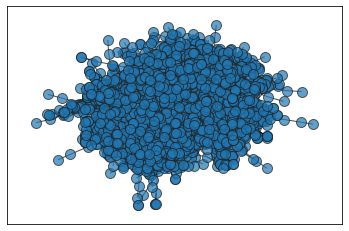

In [4]:
G = nx.read_edgelist("data/lastfm_asia_edges.csv", delimiter=",")
nx.draw_networkx(G, with_labels=False, node_size=100, edgecolors="#202020", alpha=0.7)
# G.number_of_edges()

2. Find the 10 nodes with the highest degree.

In [5]:
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[:10]

[('7237', 216),
 ('3530', 175),
 ('4785', 174),
 ('524', 172),
 ('3450', 159),
 ('2510', 140),
 ('3597', 124),
 ('2854', 119),
 ('6101', 119),
 ('5127', 119)]

3. Find the 10 nodes with the highest betweenness centrality.

In [6]:
highest_betweenness_cent = {k: v for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_betweenness_cent.items()][:10]}

{'7199': 0.08993132921587156,
 '7237': 0.08558851292049027,
 '2854': 0.077563011903684,
 '4356': 0.06724977863524628,
 '6101': 0.051804797126635244,
 '5454': 0.043613830289128734,
 '4338': 0.04289874773767917,
 '5127': 0.038412349470904675,
 '3450': 0.036932802520032906,
 '4785': 0.034960797890157956}

4. Find the 10 nodes with the highest clustering coefficient. If there are ties, choose 10 to report and explain how the 10 were chosen.

In [7]:
highest_clustering = {k: v for k, v in sorted(nx.clustering(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_clustering.items()][:10]}

{'12': 1.0,
 '2625': 1.0,
 '3740': 1.0,
 '2301': 1.0,
 '3562': 1.0,
 '42': 1.0,
 '46': 1.0,
 '5195': 1.0,
 '5474': 1.0,
 '3008': 1.0}

A lot of duplicates the clustering. We used the NetworkX clustering function to perform this. We used sorted() function to cycle through with the reverse paramter set as True to get the highest value of the dictionary at the top.

5. Find the top 10 nodes as ranked by prestige centrality (eigenvector centrality in networkx).

In [8]:
highest_prestige_cent = {k: v for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_prestige_cent.items()][:10]}

{'7237': 0.256134231102378,
 '3240': 0.19657824079541275,
 '3597': 0.19082938528653803,
 '763': 0.18168465975492687,
 '378': 0.16424646725239936,
 '2083': 0.16272123075395906,
 '1334': 0.1625309135128099,
 '3544': 0.151873662868128,
 '4809': 0.1512824322578676,
 '2734': 0.1464879585121097}

6. Find the top 10 nodes as ranked by Pagerank.

In [9]:
highest_pgrank = {k: v for k, v in sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True)}
{k:v for (k,v) in [x for x in highest_pgrank.items()][:10]}

{'4811': 0.0034207101040038806,
 '4785': 0.003261332771883333,
 '3530': 0.0027190464788557044,
 '7237': 0.0025805027648334988,
 '3450': 0.002431449702413466,
 '2854': 0.0023561637916072954,
 '2510': 0.0023172590563457153,
 '524': 0.001966829068839528,
 '5127': 0.0018858456199523778,
 '6101': 0.0017762813264083851}

7. (3 points) Comment on the differences and similarities in questions Part 3 1-6. Are the highly ranked nodes mostly the same? Do you notice significant differences in the rankings? Why do you think this is the case?

Highly Ranked nodes are not often the same throughout Part 3, but we have a very common node which is 7237 that appeared as top one twice and node. It has the highest degree and it is the most prestiegous node in the dataset. We also had 3450 that appeared 3 times as well. There are different nodes across all rankings. It could be because of how connected a lot of different nodes are in different sections of the graph it varied across each ranking. In 3.4 we have lots of duplicates, with many nodes representing a clustering coefficient of 1, meaning that this neighborhood is well connected. This confirms our initial hypothesis of how social networks operate and that some neighborhoods will be better connected than others. 